In [30]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

import warnings
warnings.filterwarnings('ignore')

In [195]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
home = pd.read_csv('dt_datasets\\New_Home_Sales_2008_2018.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
home['dpm'] = home.index.daysinmonth
home['daily'] = home['val'] / home['dpm']
home.head()

,per_idx,cat_idx,dt_idx,et_idx,geo_idx,is_adj,val,dpm,daily
Month,,,,,,,,,
2008-01-01,541,1,1,0,1,0,44,31,1.419355
2008-02-01,542,1,1,0,1,0,48,29,1.655172
2008-03-01,543,1,1,0,1,0,49,31,1.580645
2008-04-01,544,1,1,0,1,0,49,30,1.633333
2008-05-01,545,1,1,0,1,0,49,31,1.580645


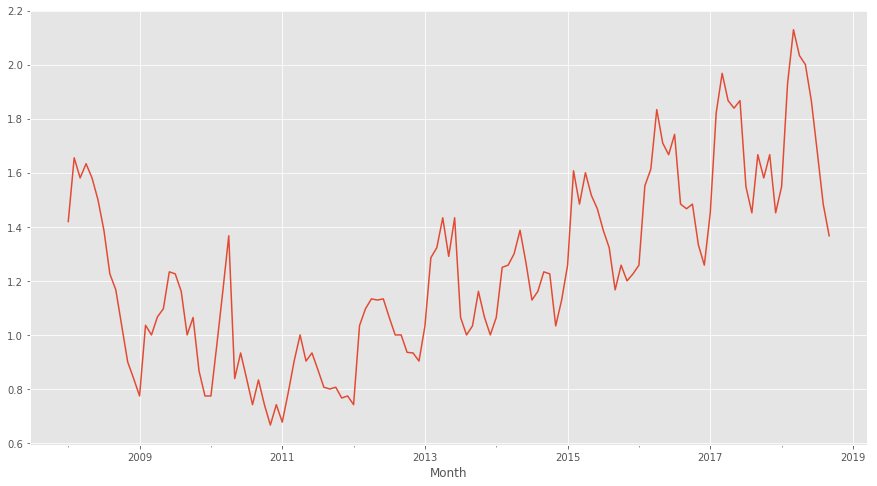

In [196]:
home['daily'].plot()

# Function to create time steps

In [197]:
def time_steps(series, window):
    
    steps = len(series)-window
    y = np.zeros(steps)
    X = np.zeros((steps, window))
    
    for i in range(steps):
        y[i] = series[i+window]
        X[i:] = np.array(series[i:i+window]).T
    
    return X, y, series.index[window:len(series)]

In [198]:
time_steps(series=home['daily'][0:12], window=5)

(array([[1.41935484, 1.65517241, 1.58064516, 1.63333333, 1.58064516],
        [1.65517241, 1.58064516, 1.63333333, 1.58064516, 1.5       ],
        [1.58064516, 1.63333333, 1.58064516, 1.5       , 1.38709677],
        [1.63333333, 1.58064516, 1.5       , 1.38709677, 1.22580645],
        [1.58064516, 1.5       , 1.38709677, 1.22580645, 1.16666667],
        [1.5       , 1.38709677, 1.22580645, 1.16666667, 1.03225806],
        [1.38709677, 1.22580645, 1.16666667, 1.03225806, 0.9       ]]),
 array([1.5       , 1.38709677, 1.22580645, 1.16666667, 1.03225806,
        0.9       , 0.83870968]),
 DatetimeIndex(['2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01',
                '2008-10-01', '2008-11-01', '2008-12-01'],
               dtype='datetime64[ns]', name='Month', freq=None))

In [199]:
window_size=12
X, y, time = time_steps(series=home['daily'], window=window_size)

In [200]:
len(X)
len(time)
time[0:10]

117

117

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

# Creating the train, validation and test sets

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train_v, X_test, y_train_v, y_test, time_train_v, time_test = train_test_split(X, y, time, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val, time_train, time_val = train_test_split(X_train_v, y_train_v, time_train_v, test_size=0.15, shuffle=False)

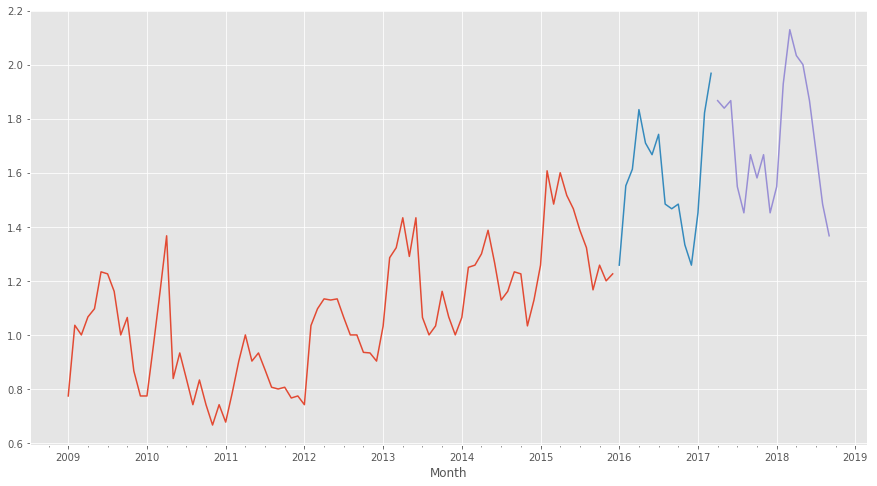

In [203]:
pd.Series(y_train.squeeze(), index=time_train).plot()
pd.Series(y_val, index=time_val).plot()
pd.Series(y_test, index=time_test).plot()

# Simple model

In [13]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.models import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Dense(input_dim=window_size, output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 1, activation = None))

In [15]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [16]:
batch_size=32
epochs=10

In [17]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),shuffle=True)

Train on 84 samples, validate on 15 samples
Epoch 1/10
84/84 [==============================] - 1s 6ms/step - loss: 0.6494 - mean_absolute_error: 0.7239 - val_loss: 0.1131 - val_mean_absolute_error: 0.2833
Epoch 2/10
84/84 [==============================] - 0s 95us/step - loss: 0.0545 - mean_absolute_error: 0.1922 - val_loss: 0.1875 - val_mean_absolute_error: 0.3859
Epoch 3/10
84/84 [==============================] - 0s 107us/step - loss: 0.1611 - mean_absolute_error: 0.3604 - val_loss: 0.0721 - val_mean_absolute_error: 0.2066
Epoch 4/10
84/84 [==============================] - 0s 95us/step - loss: 0.0484 - mean_absolute_error: 0.1840 - val_loss: 0.0805 - val_mean_absolute_error: 0.2303
Epoch 5/10
84/84 [==============================] - 0s 95us/step - loss: 0.0454 - mean_absolute_error: 0.1695 - val_loss: 0.1931 - val_mean_absolute_error: 0.3917
Epoch 6/10
84/84 [==============================] - 0s 83us/step - loss: 0.0648 - mean_absolute_error: 0.2083 - val_loss: 0.1369 - val_mean_a

In [18]:
y_hat = model.predict(X_test)

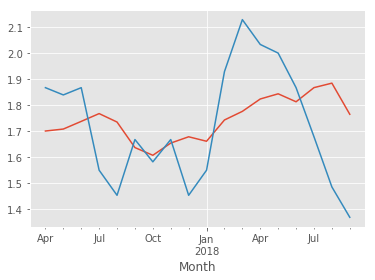

In [19]:
pd.Series(y_hat.squeeze(), index=time_test).plot()
pd.Series(y_test, index=time_test).plot()

In [20]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print('Loss: %.3f' % scores[0])
print('MAE: %.3f' % scores[1])

18/18 [==============================] - 0s 498us/step
Loss: 0.047
MAE: 0.183


In [21]:
from sklearn.metrics import mean_squared_error

def measure_error(actual, pred, label=None, show=True):
    sq_error = mean_squared_error(actual, pred)
    mse = np.mean(sq_error)**.5
    avg = np.mean(actual)
    errors = {'RMSE': mse, 'RMSE_pcent': mse / avg, 'label':label}
    if show:
        for (k,v) in errors.items():
            print('%s = %s' % (k,v))
    return errors

#measure_error(actual=y_hat, pred=y_test, label=None, show=True)
measure_error(actual=y_test, pred=y_hat, label=None, show=True)

RMSE_pcent = 0.12558957111626273
RMSE = 0.21609487349647102
label = None


{'RMSE': 0.21609487349647102, 'RMSE_pcent': 0.12558957111626273, 'label': None}

In [22]:
###Forecast

In [23]:
def forecast_nn(model, X_test, horizon):
    
    forecast=[]
    test = X_test[0]
    for i in range(horizon):
        pred = model.predict(test.reshape(1,-1))[0][0]
        forecast.append(pred)
        test = np.append(test[1:],pred)
    
    return forecast

In [24]:
f_nn = forecast_nn(model=model, X_test=X_test, horizon=len(y_test))

Text(0.5,1,'Predictions vs Test')

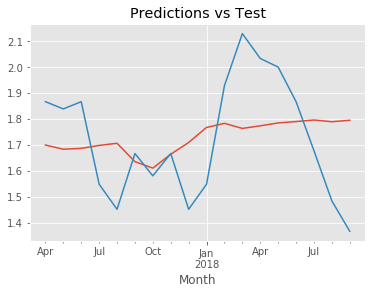

In [25]:
pd.Series(f_nn , index=time_test).plot()
pd.Series(y_test, index=time_test).plot()
plt.title('Predictions vs Test')

In [26]:
measure_error(actual=y_test, pred=f_nn, label=None, show=True)

RMSE_pcent = 0.1265291996004255
RMSE = 0.21771163909742097
label = None


{'RMSE': 0.21771163909742097, 'RMSE_pcent': 0.1265291996004255, 'label': None}

# Simple model with log transform

In [37]:
window_size=12
X_l, y_l, time_l = time_steps(series=np.log(home['daily']), window=window_size)

In [38]:
X_train_v_l, X_test_l, y_train_v_l, y_test_l, time_train_v_l, time_test_l = train_test_split(X_l, y_l, time_l, test_size=0.15, shuffle=False)
X_train_l, X_val_l, y_train_l, y_val_l, time_train_l, time_val_l = train_test_split(X_train_v_l, y_train_v_l, time_train_v_l, test_size=0.15, shuffle=False)

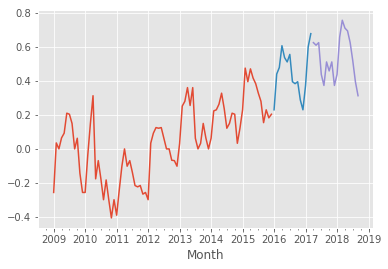

In [39]:
pd.Series(y_train_l.squeeze(), index=time_train_l).plot()
pd.Series(y_val_l, index=time_val_l).plot()
pd.Series(y_test_l, index=time_test_l).plot()

In [40]:
model2 = Sequential()
model2.add(Dense(input_dim=window_size, output_dim = 128, activation = 'relu'))
model2.add(Dense(output_dim = 128, activation = 'relu'))
model2.add(Dense(output_dim = 1, activation = None))

# Compiling the CNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [41]:
batch_size=32
epochs=20
model2.fit(X_train_l, y_train_l, batch_size=batch_size, epochs=epochs, validation_data=(X_val_l, y_val_l),shuffle=True)

Train on 84 samples, validate on 15 samples
Epoch 1/20
84/84 [==============================] - 0s 3ms/step - loss: 0.0361 - mean_absolute_error: 0.1516 - val_loss: 0.0386 - val_mean_absolute_error: 0.1627
Epoch 2/20
84/84 [==============================] - 0s 71us/step - loss: 0.0228 - mean_absolute_error: 0.1207 - val_loss: 0.0196 - val_mean_absolute_error: 0.1284
Epoch 3/20
84/84 [==============================] - 0s 71us/step - loss: 0.0186 - mean_absolute_error: 0.1086 - val_loss: 0.0134 - val_mean_absolute_error: 0.1035
Epoch 4/20
84/84 [==============================] - 0s 59us/step - loss: 0.0160 - mean_absolute_error: 0.1002 - val_loss: 0.0136 - val_mean_absolute_error: 0.0948
Epoch 5/20
84/84 [==============================] - 0s 59us/step - loss: 0.0131 - mean_absolute_error: 0.0878 - val_loss: 0.0130 - val_mean_absolute_error: 0.0884
Epoch 6/20
84/84 [==============================] - 0s 59us/step - loss: 0.0121 - mean_absolute_error: 0.0825 - val_loss: 0.0102 - val_mean_ab

In [42]:
y_hat_l = model2.predict(X_test_l)

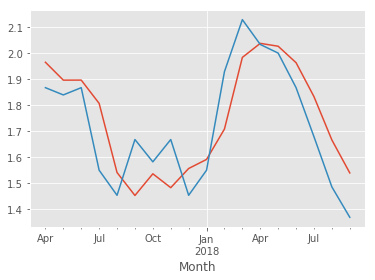

In [43]:
pd.Series(np.exp(y_hat_l).squeeze(), index=time_test_l).plot()
pd.Series(np.exp(y_test_l), index=time_test_l).plot()

In [46]:
# Evaluate the model
scores = model2.evaluate(X_test_l, y_test_l)
print('Loss: %.3f' % scores[0])
print('MAE: %.3f' % scores[1])

18/18 [==============================] - 0s 55us/step
Loss: 0.007
MAE: 0.071


In [44]:
measure_error(actual=y_test, pred=f_nn, label=None, show=True)

RMSE = 0.16230241945063079
RMSE_pcent = 0.09432658406063195
label = None


{'RMSE': 0.16230241945063079, 'RMSE_pcent': 0.09432658406063195, 'label': None}

In [45]:
##Forecast

In [47]:
f_nn_l = forecast_nn(model=model2, X_test=X_test_l, horizon=len(y_test_l))

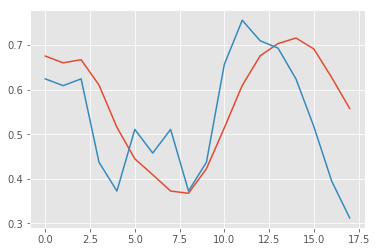

In [48]:
plt.plot(f_nn_l)
plt.plot(y_test_l)

In [49]:
measure_error(actual=y_test_l, pred=f_nn_l , label=None, show=True)

RMSE = 0.12458674806230287
RMSE_pcent = 0.23310612199122377
label = None


{'RMSE': 0.12458674806230287, 'RMSE_pcent': 0.23310612199122377, 'label': None}

# Simple model with differencing

In [52]:
home['daily'].diff(periods=1).dropna().head()

Month
2008-02-01    0.235818
2008-03-01   -0.074527
2008-04-01    0.052688
2008-05-01   -0.052688
2008-06-01   -0.080645
Name: daily, dtype: float64

In [53]:
window_size=12
X_d, y_d, time_d = time_steps(series=home['daily'].diff(periods=1).dropna(), window=window_size)

In [54]:
X_train_v_d, X_test_d, y_train_v_d, y_test_d, time_train_v_d, time_test_d = train_test_split(X_d, y_d, time_d, test_size=0.15, shuffle=False)
X_train_d, X_val_d, y_train_d, y_val_d, time_train_d, time_val_d = train_test_split(X_train_v_d, y_train_v_d, time_train_v_d, test_size=0.15, shuffle=False)

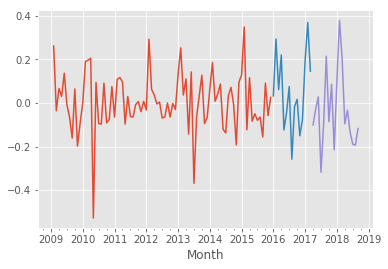

In [55]:
pd.Series(y_train_d.squeeze(), index=time_train_d).plot()
pd.Series(y_val_d, index=time_val_d).plot()
pd.Series(y_test_d, index=time_test_d).plot()

In [56]:
model3 = Sequential()
model3.add(Dense(input_dim=window_size, output_dim = 128, activation = 'relu'))
model3.add(Dense(output_dim = 128, activation = 'relu'))
model3.add(Dense(output_dim = 50, activation = 'relu'))
model3.add(Dense(output_dim = 20, activation = 'relu'))
model3.add(Dense(output_dim = 1, activation = None))

# Compiling the CNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [58]:
batch_size=32
epochs=50
model3.fit(X_train_d, y_train_d, batch_size=batch_size, epochs=epochs, validation_data=(X_val_d, y_val_d),shuffle=True)

Train on 83 samples, validate on 15 samples
Epoch 1/50
83/83 [==============================] - 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0999 - val_loss: 0.0301 - val_mean_absolute_error: 0.1395
Epoch 2/50
83/83 [==============================] - 0s 96us/step - loss: 0.0151 - mean_absolute_error: 0.0899 - val_loss: 0.0263 - val_mean_absolute_error: 0.1315
Epoch 3/50
83/83 [==============================] - 0s 96us/step - loss: 0.0133 - mean_absolute_error: 0.0819 - val_loss: 0.0234 - val_mean_absolute_error: 0.1263
Epoch 4/50
83/83 [==============================] - 0s 96us/step - loss: 0.0115 - mean_absolute_error: 0.0761 - val_loss: 0.0216 - val_mean_absolute_error: 0.1229
Epoch 5/50
83/83 [==============================] - 0s 108us/step - loss: 0.0102 - mean_absolute_error: 0.0697 - val_loss: 0.0205 - val_mean_absolute_error: 0.1225
Epoch 6/50
83/83 [==============================] - 0s 108us/step - loss: 0.0090 - mean_absolute_error: 0.0659 - val_loss: 0.0182 - val_mean_

In [57]:
y_hat_d = model3.predict(X_test_d)

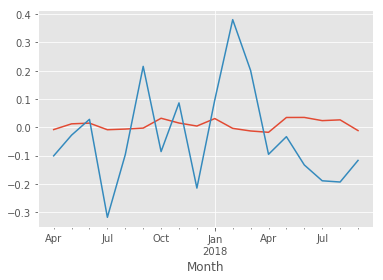

In [59]:
pd.Series(y_hat_d.squeeze(), index=time_test_d).plot()
pd.Series(y_test_d, index=time_test_d).plot()

In [62]:
pd.Series(y_test_d, index=time_test_d).head()

Month
2017-04-01   -0.101075
2017-05-01   -0.027957
2017-06-01    0.027957
2017-07-01   -0.318280
2017-08-01   -0.096774
dtype: float64

In [63]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval] 
    
history=[home['daily']['2008-01-01']] #first value
y_hat_d_undiff=[]

for pred in y_hat_d:
    pred_new = inverse_difference(history, pred, interval=1)
    y_hat_d_undiff.append(pred_new)
    history.append(pred_new)

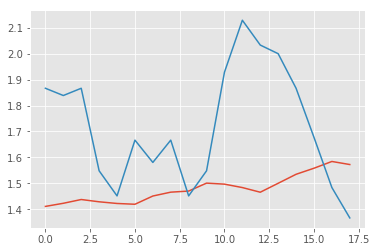

In [64]:
plt.plot(y_hat_d_undiff)
plt.plot(y_test)

In [65]:
# Evaluate the model
scores = model3.evaluate(X_test_d, y_test_d)
print('Loss: %.3f' % scores[0])
print('MAE: %.3f' % scores[1])

18/18 [==============================] - 0s 55us/step
Loss: 0.019
MAE: 0.116


In [66]:
#measure_error(actual=y_hat, pred=y_test, label=None, show=True)
measure_error(actual=y_test, pred=y_hat_d_undiff, label=None, show=True)

RMSE = 0.3376077511952455
RMSE_pcent = 0.19621017376346617
label = None


{'RMSE': 0.3376077511952455, 'RMSE_pcent': 0.19621017376346617, 'label': None}

In [68]:
###Forecast

In [67]:
f_nn_d = forecast_nn(model=model, X_test=X_test_d, horizon=len(y_test_d))

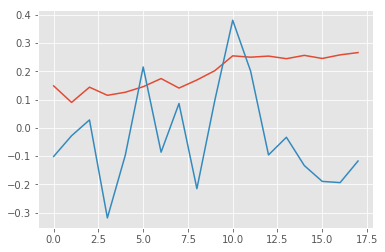

In [69]:
plt.plot(f_nn_d)
plt.plot(y_test_d)

In [74]:
#measure_error(actual=y_hat, pred=y_test, label=None, show=True)
measure_error(actual=y_test_d, pred=f_nn_d, label=None, show=True)

RMSE = 0.2856723790122212
RMSE_pcent = -8.55484011567904
label = None


{'RMSE': 0.2856723790122212, 'RMSE_pcent': -8.55484011567904, 'label': None}

# RNN

In [75]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_val.shape

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test.shape

(84, 12, 1)

(15, 12, 1)

(18, 12, 1)

In [76]:
model4 = Sequential()
model4.add(LSTM(128, batch_input_shape=(None,window_size,1), activation='relu', return_sequences=True))
model4.add(LSTM(128, batch_input_shape=(None,window_size,1), activation='relu'))
model4.add(Dense(1, activation=None))

# Compiling the CNN
model4.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [77]:
batch_size=32
epochs=50
model4.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),shuffle=True)

Train on 84 samples, validate on 15 samples
Epoch 1/50
84/84 [==============================] - 1s 17ms/step - loss: 1.1642 - mean_absolute_error: 1.0557 - val_loss: 2.0959 - val_mean_absolute_error: 1.4326
Epoch 2/50
84/84 [==============================] - 0s 884us/step - loss: 0.9059 - mean_absolute_error: 0.9268 - val_loss: 1.5792 - val_mean_absolute_error: 1.2386
Epoch 3/50
84/84 [==============================] - 0s 724us/step - loss: 0.6311 - mean_absolute_error: 0.7661 - val_loss: 0.8888 - val_mean_absolute_error: 0.9170
Epoch 4/50
84/84 [==============================] - 0s 712us/step - loss: 0.2849 - mean_absolute_error: 0.4891 - val_loss: 0.1019 - val_mean_absolute_error: 0.2699
Epoch 5/50
84/84 [==============================] - 0s 902us/step - loss: 0.0908 - mean_absolute_error: 0.2210 - val_loss: 0.4990 - val_mean_absolute_error: 0.6345
Epoch 6/50
84/84 [==============================] - 0s 736us/step - loss: 0.1459 - mean_absolute_error: 0.3046 - val_loss: 0.0667 - val_m

In [78]:
y_hat_rnn = model4.predict(X_test)

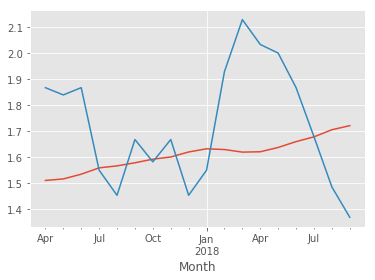

In [80]:
pd.Series(y_hat_rnn.squeeze(), index=time_test).plot()
pd.Series(y_test, index=time_test).plot()

In [84]:
from sklearn.metrics import mean_squared_error

def measure_error(actual, pred, label=None, show=True):
    sq_error = mean_squared_error(actual, pred)
    mse = np.mean(sq_error)**.5
    avg = np.mean(actual)
    errors = {'RMSE': mse, 'RMSE_pcent': mse / avg, 'label':label}
    if show:
        for (k,v) in errors.items():
            print('%s = %s' % (k,v))
    return errors

measure_error(actual=y_test, pred=y_hat_rnn, label=None, show=True)

RMSE = 0.26631163679219616
RMSE_pcent = 0.1547744456258378
label = None


{'RMSE': 0.26631163679219616, 'RMSE_pcent': 0.1547744456258378, 'label': None}

In [63]:
def forecast_lstm(model, X_test, horizon):
    
    forecast=[]
    test = X_test[0]
    for i in range(horizon):
        pred = model.predict(test.reshape(1,window_size,-1))[0][0]
        forecast.append(pred)
        test = np.append(test[1:],pred)
    
    return forecast

In [86]:
##Forecast

In [87]:
f_rnn = forecast_lstm(model=model4, X_test=X_test, horizon=len(y_test))

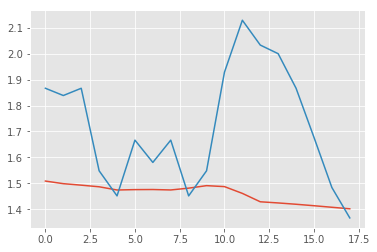

In [88]:
plt.plot(f_rnn)
plt.plot(y_test)

In [90]:
measure_error(actual=y_test, pred=f_rnn, label=None, show=True)

RMSE = 0.34074118416608046
RMSE_pcent = 0.19803125584913234
label = None


{'RMSE': 0.34074118416608046, 'RMSE_pcent': 0.19803125584913234, 'label': None}

# Function to run a model

In [27]:
def run_time_series_model(series, window_size, batch_size, keras_model, epochs, is_rnn=False):
    
    X, y, time = time_steps(series=series, window=window_size)
    X_train_v, X_test, y_train_v, y_test, time_train_v, time_test = train_test_split(X, y, time, test_size=0.15, shuffle=False)
    X_train, X_val, y_train, y_val, time_train, time_val = train_test_split(X_train_v, y_train_v, time_train_v, test_size=0.15, shuffle=False)
    
    pd.Series(y_train.squeeze(), index=time_train).plot()
    pd.Series(y_val, index=time_val).plot()
    pd.Series(y_test, index=time_test).plot()
    plt.title('Train, Validation and Test sets')
    plt.show();
    
    if is_rnn==True:
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    keras_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),shuffle=True)
    y_hat = keras_model.predict(X_test)
    
    # Evaluate the model
    scores = keras_model.evaluate(X_test, y_test)
    print('Mean Absolute Error on Test set')
    print('Loss: %.3f' % scores[0])
    print('MSE: %.3f' % scores[1])
    
    
    pd.Series(y_hat.squeeze(), index=time_test).plot()
    pd.Series(y_test, index=time_test).plot()
    plt.title('Predictions vs Test')
    plt.show();
    
    return y_hat, y_test, scores[1]
    

Best Regular NN model:

In [205]:
series=home['daily']
window_size=12
batch_size=32
epochs=20

model = Sequential()
model.add(Dense(input_dim=window_size, output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 128, activation = 'relu'))
model.add(Dense(output_dim = 1, activation = None))

opt = keras.optimizers.adam(lr=0.003, decay=1e-6)
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mean_squared_error'])
keras_model = model

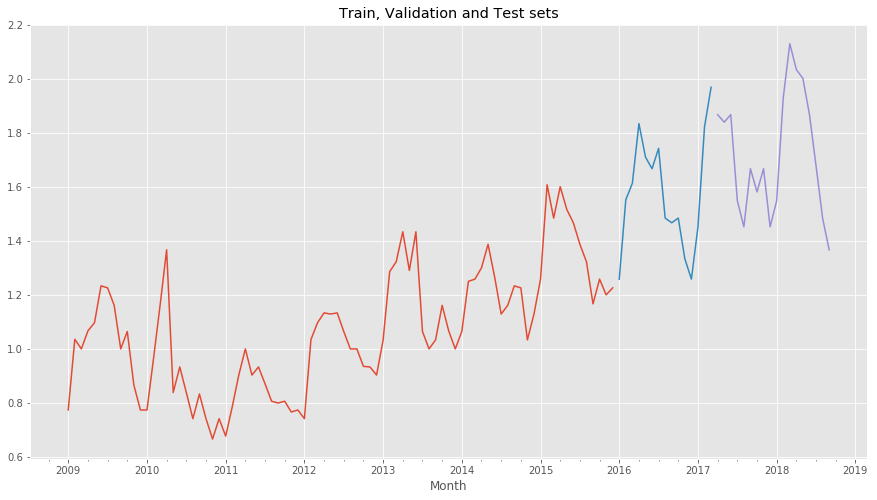

Train on 84 samples, validate on 15 samples
Epoch 1/20
84/84 [==============================] - 0s 107us/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 2/20
84/84 [==============================] - 0s 131us/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 3/20
84/84 [==============================] - 0s 178us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 4/20
84/84 [==============================] - 0s 166us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 5/20
84/84 [==============================] - 0s 131us/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 6/20
84/84 [==============================] - 0s 202us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0121 - val_mean_square

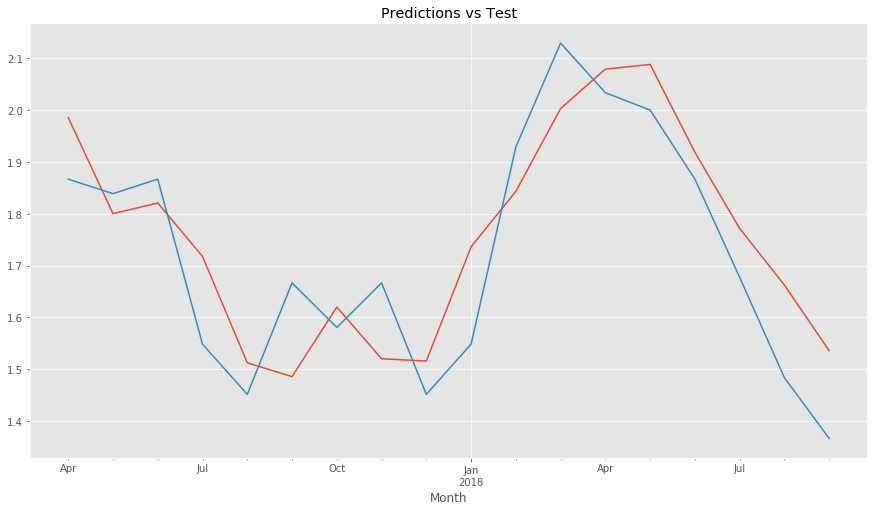

In [239]:
epochs=20
y_hat, y_test, mae = run_time_series_model(series, window_size, batch_size, keras_model, epochs, is_rnn=False)

In [240]:
measure_error(actual=y_test, pred=y_hat, label=None, show=True)

RMSE_pcent = 0.06851888745245323
RMSE = 0.11789657520567402
label = None


{'RMSE': 0.11789657520567402, 'RMSE_pcent': 0.06851888745245323, 'label': None}

In [241]:
##forecast

In [242]:
f_nn = forecast_nn(model=model, X_test=X_test, horizon=len(y_test))

Text(0.5,1,'Predictions vs Test')

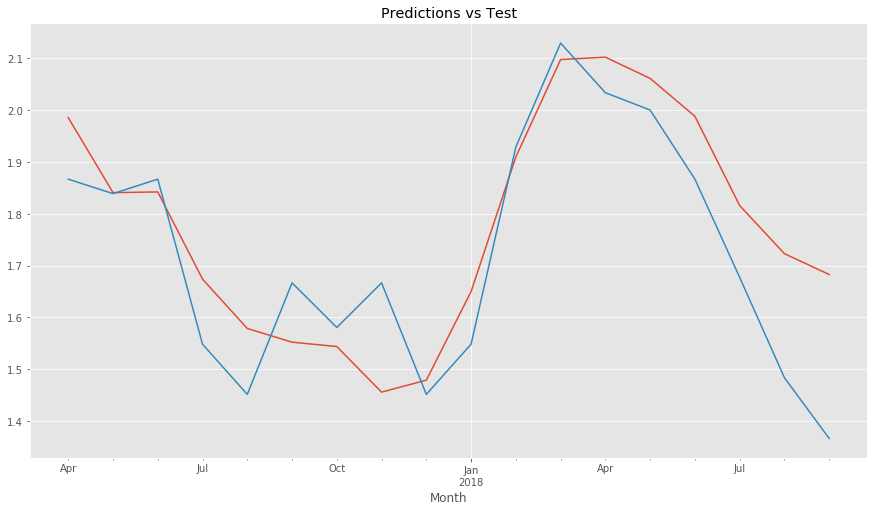

In [243]:
pd.Series(f_nn, index=time_test).plot()
pd.Series(y_test, index=time_test).plot()
plt.title('Predictions vs Test')

In [244]:
#measure_error(actual=y_hat, pred=y_test, label=None, show=True)
measure_error(actual=y_test, pred=f_nn, label=None, show=True)

RMSE_pcent = 0.07715754478212918
RMSE = 0.132760624395774
label = None


{'RMSE': 0.132760624395774, 'RMSE_pcent': 0.07715754478212918, 'label': None}

In [245]:
model.save_weights("best_simple_model_home_sale.h5")

Best RNN Model:

In [165]:
epochs=50
window_size=12

model5 = Sequential()
model5.add(LSTM(128, batch_input_shape=(None,window_size,1), recurrent_dropout=0.1, activation='relu'))
model5.add(Dense(1, activation=None))

# Compiling the CNN
opt = keras.optimizers.adam(lr=0.003, decay=1e-6)
model5.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mean_squared_error'])

keras_model = model5

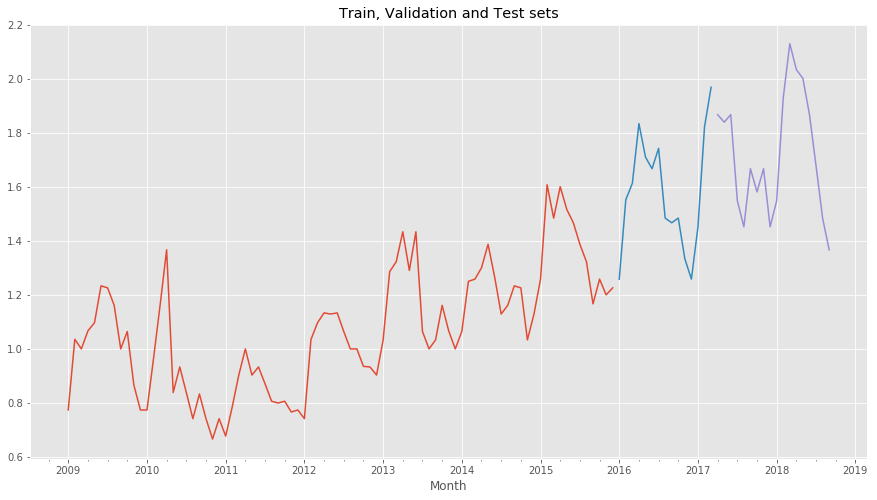

Train on 84 samples, validate on 15 samples
Epoch 1/50
84/84 [==============================] - 0s 522us/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 2/50
84/84 [==============================] - 0s 1ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 3/50
84/84 [==============================] - 0s 950us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 4/50
84/84 [==============================] - 0s 1ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 5/50
84/84 [==============================] - 0s 819us/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 6/50
84/84 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0233 - val_mean_squared_erro

18/18 [==============================] - 0s 277us/step
Mean Absolute Error on Test set
Loss: 0.020
MSE: 0.020


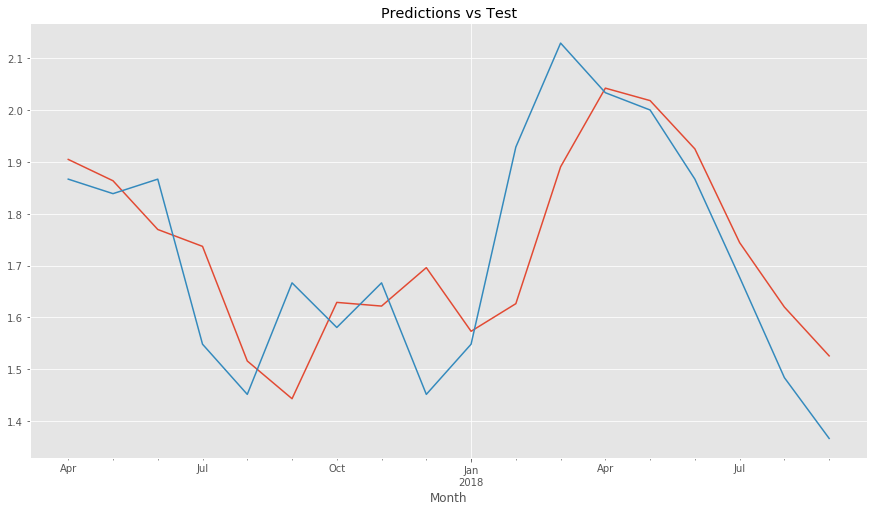

In [173]:
y_hat5, y_test5, mse5 = run_time_series_model(series, window_size, batch_size, keras_model, epochs, is_rnn=True)

In [174]:
measure_error(actual=y_test5, pred=y_hat5, label=None, show=True)

RMSE_pcent = 0.08288506344916531
RMSE = 0.14261564190081888
label = None


{'RMSE': 0.14261564190081888, 'RMSE_pcent': 0.08288506344916531, 'label': None}

In [175]:
###Forecast

In [176]:
f_rnn5 = forecast_lstm(model=model5, X_test=X_test, horizon=len(y_test5))

Text(0.5,1,'Predictions vs Test')

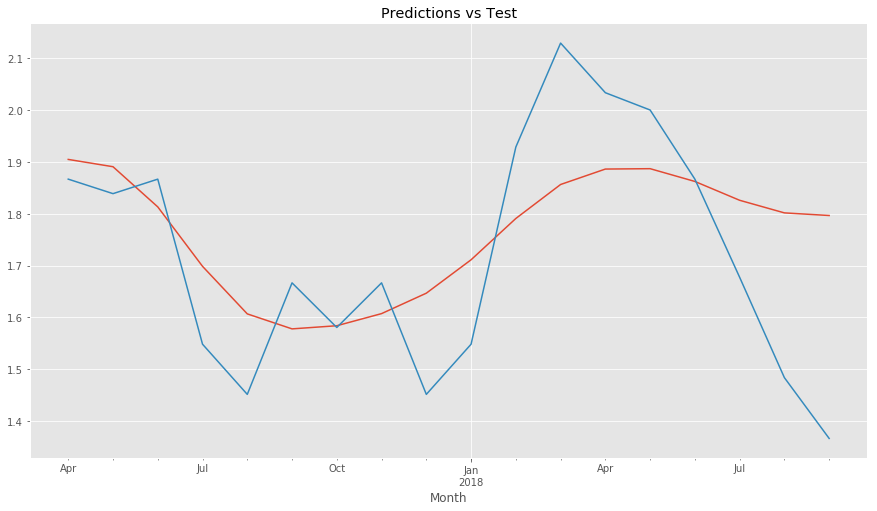

In [177]:
pd.Series(f_rnn5, index=time_test).plot()
pd.Series(y_test5, index=time_test).plot()
plt.title('Predictions vs Test')

In [178]:
measure_error(actual=y_test5, pred=f_rnn5, label=None, show=True)

RMSE_pcent = 0.10298991430098833
RMSE = 0.17720892192299686
label = None


{'RMSE': 0.17720892192299686, 'RMSE_pcent': 0.10298991430098833, 'label': None}

In [246]:
model5.save_weights("best_rnn_model_home_sale.h5")

# SARIMA

In [179]:
X_train_series = home['daily'][time_train[0]:time_train[-1]]
X_val_series = home['daily'][time_val[0]:time_val[-1]]
X_test_series = home['daily'][time_test[0]:time_test[-1]]

In [180]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
    
def measure_error(actual, pred, label=None, show=True):
    sq_error = mean_squared_error(actual, pred)
    mse = np.mean(sq_error)**.5
    avg = np.mean(actual)
    errors = {'RMSE': mse, 'RMSE_pcent': mse / avg, 'label':label}
    if show:
        for (k,v) in errors.items():
            print('%s = %s' % (k,v))
    return errors


def run_ad_fuller(X):
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] > 0.05:
        print('\nWe fail to reject the Null Hypothesis (H0) -- the time series has a unit root and is not stationary')
    else:
        print('\nWe reject the Null Hypothesis (H0) -- the time series is stationary')
    p_value=result[1]
    return p_value

def make_stationary(X, max_diff=10, boxcox_transformation=True):
    
    import copy
    p_value_diff=1
    p_value_boxcox=1
    i=1
    s = copy.deepcopy(X)
    lbda=None
    
    if boxcox_transformation==True:
        s, lbda = stats.boxcox(X)
        s = pd.Series(s, index=X.index)
        print("Series after boxcox transformation")
        p_value_boxcox=run_ad_fuller(s)
    
    #if boxcox transformation makes the series stationary, we skip this
    if p_value_boxcox>0.05:
        while p_value_diff>0.05:
            s=s.diff(periods=1)
            print("Series after {} differencing".format(i))
            p_value_diff= run_ad_fuller(s.dropna())
            i+=1
            if i==max_diff:
                break   
    return s.dropna(), lbda

def box_cox(X):
    f = plt.figure()
    ax_1 = f.add_subplot(211)
    
    prob = stats.probplot(X, dist=stats.norm, plot=ax_1)
    ax_1.set_xlabel('')
    ax_1.set_title('Probability vs Normal')

    ax_2 = f.add_subplot(212)
    Y, lbda = stats.boxcox(X)
    Y=pd.Series(Y, index=X.index)
    prob = stats.probplot(Y, dist=stats.norm, plot=ax_2)
    ax_2.set_title('After Box-Cox transformation')
    plt.show()
    print('lambda : %f'% lbda)
    print('std(R)', np.std(X), np.mean(X), np.std(X)/ np.mean(X))
    print('std(Y)', np.std(Y), np.mean(Y),np.std(Y)/ np.mean(Y))
    return (Y,lbda)

def inv_box_cox(y,lbda):
    if lbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lbda * np.array(y) + 1) / lbda)

Making the series stationary with a Box-Cox transformation:

In [181]:
X_train_series_new, lbda = make_stationary(X_train_series, max_diff=10, boxcox_transformation=True)
lbda

Series after boxcox transformation
ADF Statistic: -0.382431
p-value: 0.912991
Critical Values:
	10%: -2.589
	1%: -3.526
	5%: -2.903

We fail to reject the Null Hypothesis (H0) -- the time series has a unit root and is not stationary
Series after 1 differencing
ADF Statistic: -2.786367
p-value: 0.060248
Critical Values:
	10%: -2.589
	1%: -3.526
	5%: -2.903

We fail to reject the Null Hypothesis (H0) -- the time series has a unit root and is not stationary
Series after 2 differencing
ADF Statistic: -6.447943
p-value: 0.000000
Critical Values:
	10%: -2.590
	1%: -3.529
	5%: -2.904

We reject the Null Hypothesis (H0) -- the time series is stationary


0.3157787494701573

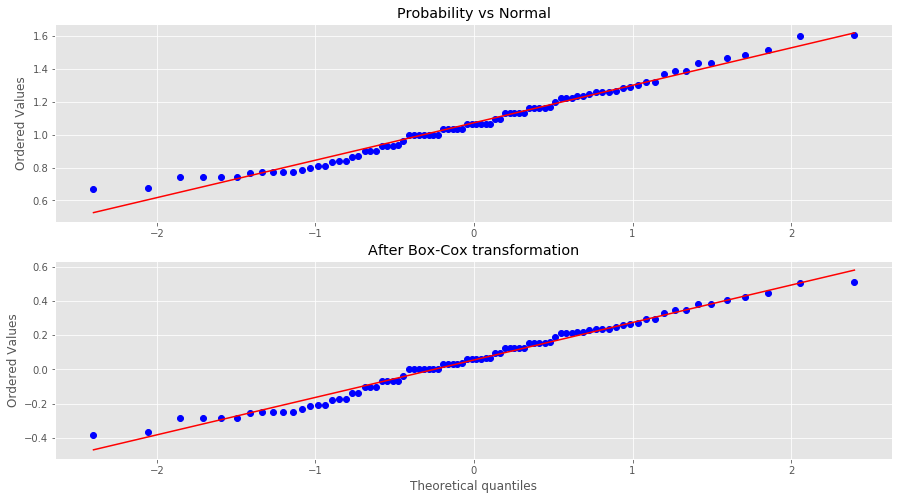

lambda : 0.315779
std(R) 0.22476910376171846 1.0724864361762503 0.2095775724335411
std(Y) 0.215149607339277 0.05527939244896502 3.8920400136073705


0.3157787494701573

In [182]:
X_train_bc, lbda = box_cox(X_train_series)
lbda

Running the SARIMA model. The order was selected doing a grid search (see the last section of the notebook):

In [183]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [184]:
#(5,0,0),(1,0,0)
sarima_model = SARIMAX(X_train_bc, trend='n', order=(4,2,1), seasonal_order=(1,0,1,12))
f_sarima = sarima_model.fit()

In [185]:
#Predict and check errors on validation set:

In [186]:
y_hat_sarima_val = f_sarima.forecast(steps=len(X_val_series))

In [187]:
y_hat_sarima_val_unbc = inv_box_cox(y_hat_sarima_val, lbda=lbda)

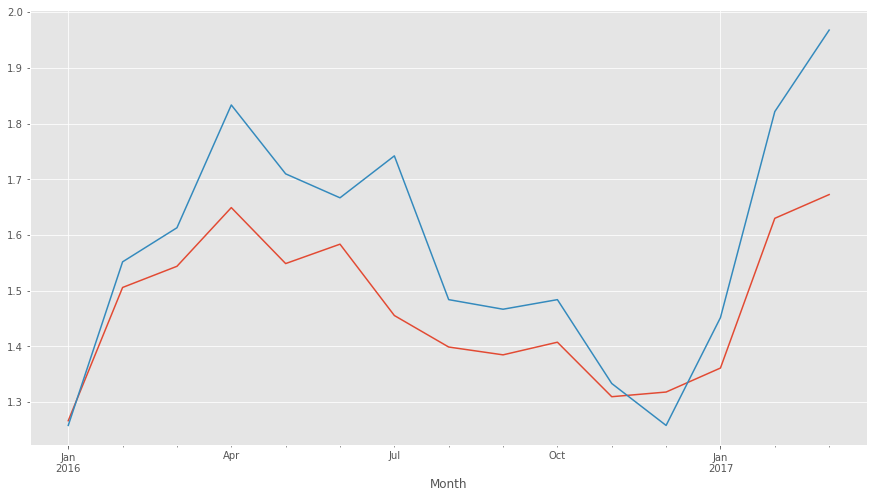

In [188]:
pd.Series(y_hat_sarima_val_unbc, index=time_val).plot()
pd.Series(y_val, index=time_val).plot()

In [189]:
measure_error(y_val, y_hat_sarima_val_unbc, label=None, show=True)

RMSE_pcent = 0.09149479498985383
RMSE = 0.1442012539271125
label = None


{'RMSE': 0.1442012539271125, 'RMSE_pcent': 0.09149479498985383, 'label': None}

In [190]:
y_hat_sarima_test = f_sarima.forecast(steps=(len(X_val_series)+len(X_test_series)))
#y_hat_sarima_test = y_hat_sarima_test[len(X_val_series):len(X_test_series)]

In [191]:
y_hat_sarima_test_unbc = inv_box_cox(y_hat_sarima_test,lbda=lbda)
y_hat_sarima_test_unbc = y_hat_sarima_test_unbc[len(X_val_series):len(X_val_series)+len(X_test_series)]

Text(0.5,1,'Predictions vs Test')

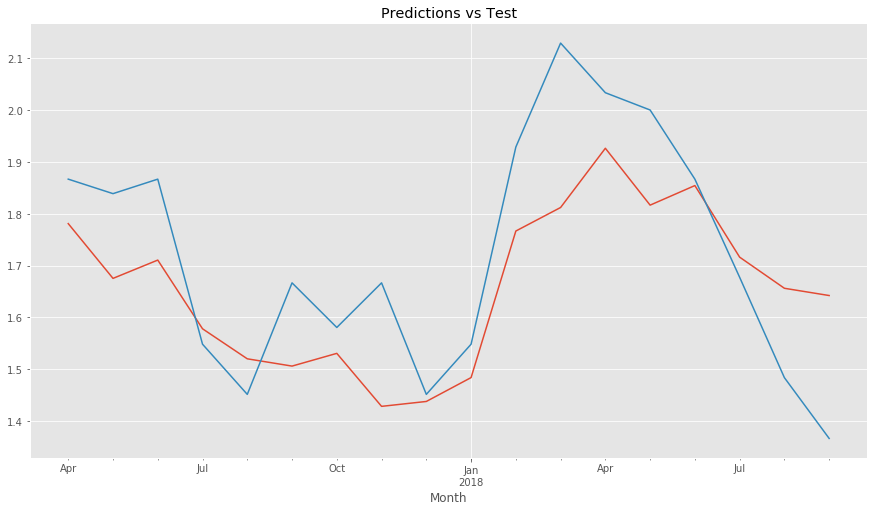

In [192]:
pd.Series(y_hat_sarima_test_unbc, index=time_test).plot()
pd.Series(y_test, index=time_test).plot()
plt.title('Predictions vs Test')

In [193]:
measure_error(y_test, y_hat_sarima_test_unbc, label=None, show=True)

RMSE_pcent = 0.09008492852479619
RMSE = 0.15500404261659012
label = None


{'RMSE': 0.15500404261659012, 'RMSE_pcent': 0.09008492852479619, 'label': None}

Function to make grid search:

In [ ]:
def ljungbox_sarima(arima_fitted_model, lags, seasonal_interval): 

    from statsmodels.stats.diagnostic import acorr_ljungbox
    (lb, p_values) = acorr_ljungbox(arima_fitted_model.resid[seasonal_interval+1:], lags=lags, boxpierce=False)
    print('Ljung-Box Test')
    print('p_values:',p_values)
    result = False in list(map(lambda p: p >.05, p_values) )
    print('\n-------\nAny false Null hypotheses? %s\n-------\n' % result )
    issues = []
    for n,p in enumerate(p_values):
        if p < .05:
            issues += [(n+1, p)]
    print('LAGS WITH INFORMATION:',issues)
    ts_plot(arima_fitted_model.resid[seasonal_interval+1:],lags=lags)
    return issues


def grid_test(X_train, X_val, grid_size, seasonal_interval, ljungbox_lags, lbda, invert_boxcox=True):

    min_error=1000000000
    error=1000000000
    issues=[]
    best_params={'p':None, 'd':None, 'q': None, 'P': None, 'D': None, 'Q': None}
    
    ps=range(0,grid_size)
    ds=range(0,2)
    qs=range(0,2)
    Ps=range(0,grid_size)
    Ds=range(0,2)
    Qs=range(0,2)
    i=1
    j=len(ps)*len(ds)*len(qs)*len(Ps)*len(Ds)*len(Qs)
      
    for p in ps:
        for d in ds:
            for q in qs:
                for P in Ps:
                    for D in Ds:
                        for Q in Qs:   
                            print("Iteration {} of {}".format(i,j))
                            try:
                                model = SARIMAX(X_train, trend='n', order=(p,d,q), seasonal_order=(P,D,Q,seasonal_interval))
                                f = model.fit()
                                y_hat = f.forecast(steps=len(X_val))
                                
                                history_sarima=[X_train_sarima_bc[time_train[-1]]] #first value
                                y_hat_undiff=[]

                                for pred in y_hat:
                                    pred_new = inverse_difference(history_sarima, pred, interval=1)
                                    y_hat_undiff.append(pred_new)
                                    history_sarima.append(pred_new)
                                
                                y_hat_undiff_unbc = inv_box_cox(y_hat_undiff,lbda=lbda)
                                
                                errors = measure_error(X_val, y_hat_undiff_unbc, label=None, show=False)
                                error = errors['RMSE']
                                #issues=ljungbox_sarima(f, ljungbox_lags, seasonal_interval)
                                print(error)
                            except:
                                pass
                            
                            if (error < min_error):# & (len(issues) == 0):
                                min_error=error
                                best_params['p']=p
                                best_params['d']=d
                                best_params['q']=q
                                best_params['P']=P
                                best_params['D']=D
                                best_params['Q']=Q
                                
                            i +=1
    
    return best_params, min_error    

In [ ]:
best_params, min_error = grid_test(X_train=X_train_series_new, X_val=X_val_series, grid_size=6, seasonal_interval=12, ljungbox_lags=20, lbda=-0.016850303197679325, invert_boxcox=True)

In [ ]:
best_params, min_error